In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
m=Base.classes.measurement
s=Base.classes.station



In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Get the table names using `inspect()`.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.

session.query(m.date).order_by(m.date.desc()).first()



('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
sel = [m.date, 
       m.prcp, 
       ]
Year = session.query(*sel).\
    filter(func.strftime("%Y-%m-%d", m.date) >= "2016-08-23").all()
    #group_by(m.date).\
    #order_by(m.date).all()
Year


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [18]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(Year, columns=['date','precipitation'])
df 

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


<Axes: xlabel='date'>

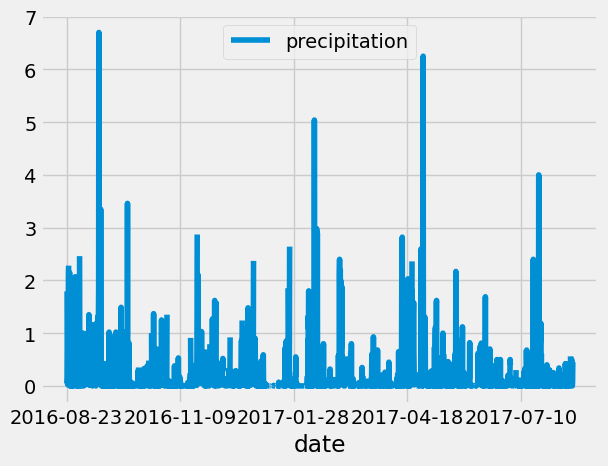

In [30]:

# Sort the dataframe by date
#df.sort_values(by='date', ascending = False, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

#plt.figure(figsize=(20,4))
#df.plot.bar()
#plt.tight_layout()
#plt.show()
#plt.set_ticklabels("2016-08-23",rotation=90)


df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.plot()

#per = df['precipitation']
#year = df['date']
#plt.figure(figsize=(80,10))
#plt.bar(year,per)
#plt.xticks(year, rotation=90)
#plt.xlabel('year')
#plt.ylabel('per')
#plt.show()



In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df[["date","precipitation"]].describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(s.station)).all()



[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(m.station, func.count(m.station)).\
    group_by(m.station).\
    order_by(func.count(m.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tmp = [
       func.min(m.tobs), 
       func.max(m.tobs), 
       func.avg(m.tobs)]
active = session.query(*tmp).\
    filter(m.station == "USC00519281").all()
    
active

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [m.station,
       m.date, 
       m.tobs, 
       ]
Year2 = session.query(*sel).\
    filter(func.strftime("%Y-%m-%d", m.date) >= "2016-08-23").all()
    #group_by(m.date).\
    #order_by(m.date).all()
Year2


[('USC00519397', '2016-08-23', 81.0),
 ('USC00519397', '2016-08-24', 79.0),
 ('USC00519397', '2016-08-25', 80.0),
 ('USC00519397', '2016-08-26', 79.0),
 ('USC00519397', '2016-08-27', 77.0),
 ('USC00519397', '2016-08-28', 78.0),
 ('USC00519397', '2016-08-29', 78.0),
 ('USC00519397', '2016-08-30', 79.0),
 ('USC00519397', '2016-08-31', 80.0),
 ('USC00519397', '2016-09-01', 81.0),
 ('USC00519397', '2016-09-02', 80.0),
 ('USC00519397', '2016-09-03', 79.0),
 ('USC00519397', '2016-09-04', 75.0),
 ('USC00519397', '2016-09-05', 79.0),
 ('USC00519397', '2016-09-06', 76.0),
 ('USC00519397', '2016-09-07', 76.0),
 ('USC00519397', '2016-09-08', 80.0),
 ('USC00519397', '2016-09-09', 79.0),
 ('USC00519397', '2016-09-10', 78.0),
 ('USC00519397', '2016-09-11', 76.0),
 ('USC00519397', '2016-09-12', 78.0),
 ('USC00519397', '2016-09-13', 78.0),
 ('USC00519397', '2016-09-14', 75.0),
 ('USC00519397', '2016-09-15', 79.0),
 ('USC00519397', '2016-09-16', 80.0),
 ('USC00519397', '2016-09-17', 79.0),
 ('USC005193

In [ ]:
df2 = pd.DataFrame(Year2, columns=['station','date','tobs'])
df2

df3 = df2.loc[df2['station']== "USC00519281"]
df3



,station,date,tobs
1529,USC00519281,2016-08-23,77.0
1530,USC00519281,2016-08-24,77.0
1531,USC00519281,2016-08-25,80.0
1532,USC00519281,2016-08-26,80.0
1533,USC00519281,2016-08-27,75.0
...,...,...,...
1876,USC00519281,2017-08-14,77.0
1877,USC00519281,2017-08-15,77.0
1878,USC00519281,2017-08-16,76.0
1879,USC00519281,2017-08-17,76.0


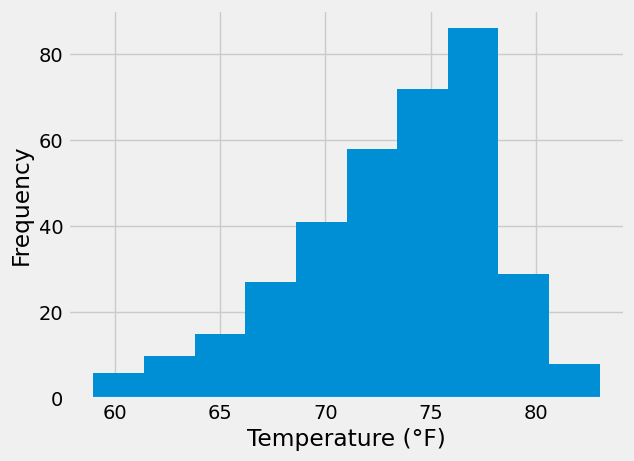

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = df3['tobs']

plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()